In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Load and transform our input data.

In [6]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=4, shuffle=True)

testset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=4, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Let's visualize some sample images from our train dataset.

horse truck plane  deer


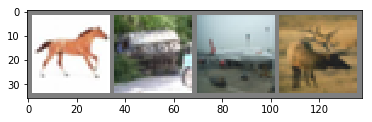

In [8]:
def imshow(img):
    npimg = (img / 2 + 0.5).numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
def visualize_training_data():
    dataiter = iter(trainloader)
    images, labels = dataiter.next()
    imshow(torchvision.utils.make_grid(images))
    print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
    
visualize_training_data()

In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

Create a Net object, a loss criterion object and an optimizer and train the network.

In [11]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d %d] loss %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

[1 2000] loss 2.185
[1 4000] loss 1.860
[1 6000] loss 1.658
[1 8000] loss 1.564
[1 10000] loss 1.518
[1 12000] loss 1.473
[2 2000] loss 1.397
[2 4000] loss 1.379
[2 6000] loss 1.349
[2 8000] loss 1.327
[2 10000] loss 1.286
[2 12000] loss 1.258
[3 2000] loss 1.179
[3 4000] loss 1.174
[3 6000] loss 1.195
[3 8000] loss 1.162
[3 10000] loss 1.172
[3 12000] loss 1.157
[4 2000] loss 1.066
[4 4000] loss 1.083
[4 6000] loss 1.072
[4 8000] loss 1.070
[4 10000] loss 1.063
[4 12000] loss 1.058
[5 2000] loss 0.985
[5 4000] loss 1.000
[5 6000] loss 1.020
[5 8000] loss 1.015
[5 10000] loss 0.988
[5 12000] loss 1.013
[6 2000] loss 0.909
[6 4000] loss 0.952
[6 6000] loss 0.945
[6 8000] loss 0.940
[6 10000] loss 0.963
[6 12000] loss 0.987
[7 2000] loss 0.868
[7 4000] loss 0.894
[7 6000] loss 0.903
[7 8000] loss 0.914
[7 10000] loss 0.910
[7 12000] loss 0.931
[8 2000] loss 0.818
[8 4000] loss 0.830
[8 6000] loss 0.865
[8 8000] loss 0.873
[8 10000] loss 0.863
[8 12000] loss 0.885
[9 2000] loss 0.765
[9 4

In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy on 10000 test images: %.2f' % (1.0 * correct / total))